## Adaboost 模型 GridSearchCV 调参

In [34]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier # Adaboost分类模型
from sklearn.tree import DecisionTreeClassifier # 决策树模型
from sklearn.datasets import make_gaussian_quantiles # 获取数据
from sklearn.model_selection import GridSearchCV # 调参函数
from sklearn.metrics import classification_report # 分类报告
import matplotlib.pyplot as plt
%matplotlib inline

### 准备数据

In [35]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
# 将两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
print(X)
print(y)

[[ 2.69359418  1.57127145]
 [-1.34129623 -0.59888875]
 [-1.14388268  0.78833843]
 ...
 [ 4.49166687  0.62316094]
 [-0.06975033  0.41068858]
 [ 1.6858925   3.60644297]]
[1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 

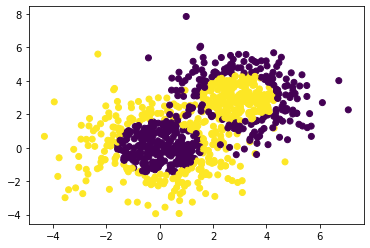

In [36]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [37]:
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

### 配置传入模型的参数

In [31]:
??AdaBoostClassifier

In [38]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5)],
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': range(100, 500, 100),
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [39]:
scores = ['precision', 'recall']
adb_clf = AdaBoostClassifier()
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(adb_clf, param_grid, cv=5)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    # 注意最后利用测试集展示的才是泛化误差
    y_true, y_pred = y_test, clf.predict(X_test)

    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision


D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'learning_rate': 0.9, 'n_estimators': 400}

Grid scores on development set:

0.746 (+/-0.113) for {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       ra

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'learning_rate': 0.9, 'n_estimators': 400}

Grid scores on development set:

0.746 (+/-0.113) for {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       ra

[参考博客](https://www.cnblogs.com/pinard/p/6136914.html)